In [5]:
import numpy as np
import math
from random import seed
from random import random
from numba import jit, prange

from functions import comp_shortest_path, read_tsp_file, read_data, TestResult

In [70]:
T_start = 1000
T_end = 0.005
cooling_factor = 0.99
nMarkov = 280
coords = read_tsp_file("TSP-Configurations/a280.tsp")


In [71]:
def loop(n):
    for i in range(n):
        itr, min_cost, optimal_list_cities = comp_shortest_path(
            T_start, T_end, cooling_factor, nMarkov, coords, dataset="a280", save_data=True)
        
loop(2)

OverflowError: math range error

In [67]:
ncities = 280
start = int(ncities/4)
step = start
stop = int(ncities*2+step)
nmarkov_list = np.arange(start, stop, step, dtype=int)
nmarkov_list
# for nmarkov in nmarkov_list:
#     loop_markov(10,n_markov=nmarkov)
    

array([ 70, 140, 210, 280, 350, 420, 490, 560])

In [31]:
df = read_data()

In [32]:
df.head()


,Minimal Cost,Optimal Path,iterations,Computation Time,Dataset,Start Temperature,End Temperature,Markov Chain Length
0,433.336992,[ 4 37 10 11 45 50 26 31 0 21 1 15 49 33 29 ...,688,11.541096,eil51,1000,1.0,1000
1,416.582378,[42 6 22 23 13 24 17 46 16 36 4 37 10 31 50 ...,688,11.451278,eil51,1000,1.0,1000
2,424.225321,[50 45 11 46 3 17 12 40 39 18 41 43 16 36 14 ...,688,12.237017,eil51,1000,1.0,1000
3,423.736762,[ 7 25 30 27 2 35 34 19 28 20 49 15 1 21 0 ...,688,11.554114,eil51,1000,1.0,1000
4,423.269945,[29 33 49 15 20 28 1 19 34 35 2 27 30 7 25 ...,688,12.906812,eil51,1000,1.0,1000


In [49]:
# df.describe()
df.groupby(headers[6]).describe()

Minimal Cost                                                \
                       count        mean       std         min         25%   
End Temperature                                                              
0.005                   10.0  423.244641  4.343441  416.539668  420.586480   
1.000                   33.0  424.696112  5.333614  412.352026  421.621099   

                                                    iterations          ...  \
                        50%         75%         max      count    mean  ...   
End Temperature                                                         ...   
0.005            423.435556  426.829458  428.675744       10.0  1215.0  ...   
1.000            424.225321  427.290256  433.974755       33.0   688.0  ...   

                Start Temperature         Markov Chain Length               \
                              75%     max               count    mean  std   
End Temperature                                                              
0.005                      1000.0  1000.0                10.0  1000.0  0.0   
1.000                      1000.0  1000.0                33.0  1000.0  0.0   

                                                         
                    min     25%     50%     75%     max  
End Temperature                                          
0.005            1000.0  1000.0  1000.0  1000.0  1000.0  
1.000            1000.0  1000.0  1000.0  1000.0  1000.0  

[2 rows x 40 columns]

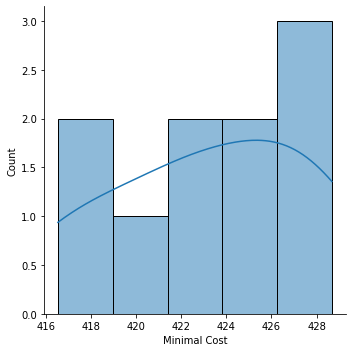

In [48]:
import seaborn as sns
headers = TestResult.headers()
sns.displot(data=df[df[headers[6]] == 0.005], x=headers[0], kde=True)

In [47]:
df[df[headers[5]] == 1000].head()

,Minimal Cost,Optimal Path,iterations,Computation Time,Dataset,Start Temperature,End Temperature,Markov Chain Length
0,433.336992,[ 4 37 10 11 45 50 26 31 0 21 1 15 49 33 29 ...,688,11.541096,eil51,1000,1.0,1000
1,416.582378,[42 6 22 23 13 24 17 46 16 36 4 37 10 31 50 ...,688,11.451278,eil51,1000,1.0,1000
2,424.225321,[50 45 11 46 3 17 12 40 39 18 41 43 16 36 14 ...,688,12.237017,eil51,1000,1.0,1000
3,423.736762,[ 7 25 30 27 2 35 34 19 28 20 49 15 1 21 0 ...,688,11.554114,eil51,1000,1.0,1000
4,423.269945,[29 33 49 15 20 28 1 19 34 35 2 27 30 7 25 ...,688,12.906812,eil51,1000,1.0,1000


In [51]:
dataset = "gsdag"
dataset != ""

True